<IPython.core.display.Javascript object>


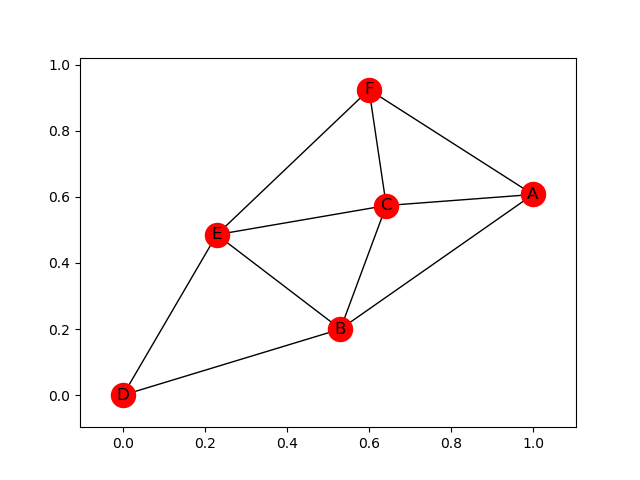

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([('A', 'B'),('A', 'C'),('A', 'F'),
                   ('B', 'C'),('B', 'D'),('B', 'E'),
                   ('C', 'E'),('C', 'F'),
                   ('D', 'E'),('E', 'F')])

nx.draw_networkx(G1)

In [5]:
degrees = G1.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G1)) for i in degree_values]
(degree_values, histogram)

([2, 3, 4], [0.16666666666666666, 0.3333333333333333, 0.5])

<IPython.core.display.Javascript object>


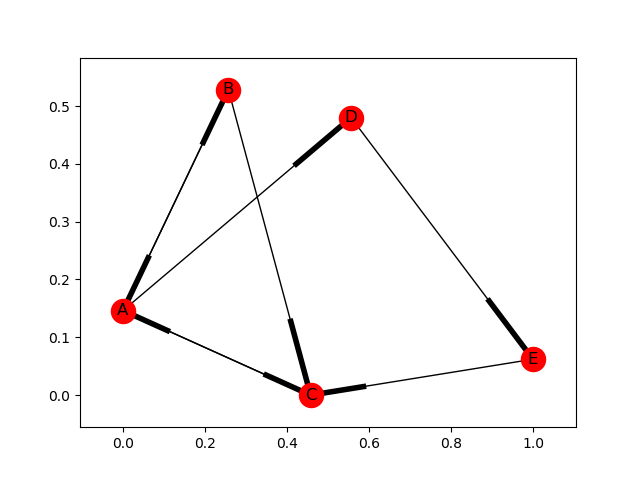

In [6]:
gd = nx.MultiDiGraph()

e = [   ('A', 'B'), ('A', 'C'), ('A', 'D'),
        ('B', 'A'), ('B', 'C'),
        ('C', 'A'),
        ('D', 'E'),
        ('E', 'C')]

gd.add_edges_from(e)
nx.draw_networkx(gd)

In [7]:
in_degrees = gd.in_degree()
in_degree_values = sorted(set(in_degrees.values()))
histogram = [list(in_degrees.values()).count(i)/float(nx.number_of_nodes(gd)) for i in in_degree_values]
(in_degree_values, histogram)

([1, 2, 3], [0.6, 0.2, 0.2])

<IPython.core.display.Javascript object>


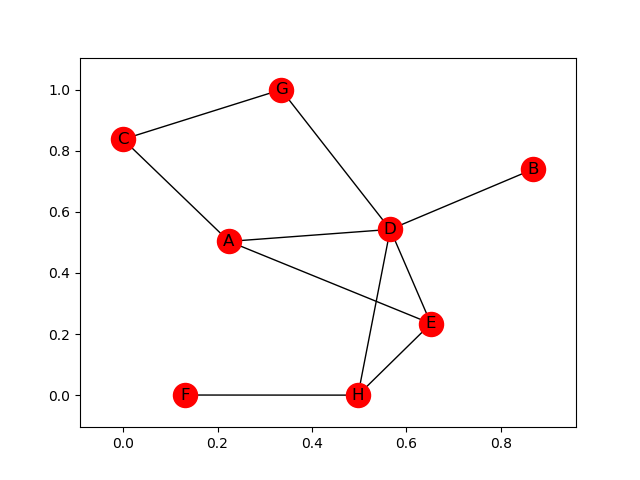

In [8]:
G3 = nx.Graph()
G3.add_edges_from([('A', 'C'),('A', 'D'),('A', 'E'),
                   ('B', 'D'),('C', 'G'),
                   ('D', 'E'),('D', 'G'),('D', 'H'),
                   ('E', 'H'),('F', 'H')])
nx.draw_networkx(G3)

In [19]:
from operator import itemgetter

common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G3, e[0],e[1])))) for e in nx.non_edges(G3)]
common_neigh.sort(key=itemgetter(2), reverse = True)
common_neigh

[('G', 'A', 2),
 ('A', 'H', 2),
 ('D', 'C', 2),
 ('G', 'E', 1),
 ('G', 'B', 1),
 ('G', 'H', 1),
 ('E', 'B', 1),
 ('E', 'F', 1),
 ('E', 'C', 1),
 ('A', 'B', 1),
 ('D', 'F', 1),
 ('B', 'H', 1),
 ('G', 'F', 0),
 ('A', 'F', 0),
 ('C', 'B', 0),
 ('C', 'F', 0),
 ('C', 'H', 0),
 ('F', 'B', 0)]

In [21]:
L = list(nx.jaccard_coefficient(G3))
L.sort(key=itemgetter(2), reverse = True)
L

[('G', 'A', 0.6666666666666666),
 ('G', 'B', 0.5),
 ('A', 'H', 0.5),
 ('D', 'C', 0.4),
 ('E', 'B', 0.3333333333333333),
 ('E', 'F', 0.3333333333333333),
 ('A', 'B', 0.3333333333333333),
 ('B', 'H', 0.3333333333333333),
 ('G', 'E', 0.25),
 ('G', 'H', 0.25),
 ('E', 'C', 0.25),
 ('D', 'F', 0.2),
 ('G', 'F', 0.0),
 ('A', 'F', 0.0),
 ('C', 'B', 0.0),
 ('C', 'F', 0.0),
 ('C', 'H', 0.0),
 ('F', 'B', 0.0)]

In [22]:
L2 = list(nx.resource_allocation_index(G3))
L2.sort(key=itemgetter(2), reverse = True)
L2

[('D', 'C', 0.8333333333333333),
 ('G', 'A', 0.7),
 ('A', 'H', 0.5333333333333333),
 ('E', 'F', 0.3333333333333333),
 ('E', 'C', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('G', 'E', 0.2),
 ('G', 'B', 0.2),
 ('G', 'H', 0.2),
 ('E', 'B', 0.2),
 ('A', 'B', 0.2),
 ('B', 'H', 0.2),
 ('G', 'F', 0),
 ('A', 'F', 0),
 ('C', 'B', 0),
 ('C', 'F', 0),
 ('C', 'H', 0),
 ('F', 'B', 0)]

In [23]:
L3 = list(nx.preferential_attachment(G3))
L3.sort(key=itemgetter(2), reverse = True)
L3

[('D', 'C', 10),
 ('A', 'H', 9),
 ('G', 'E', 6),
 ('G', 'A', 6),
 ('G', 'H', 6),
 ('E', 'C', 6),
 ('C', 'H', 6),
 ('D', 'F', 5),
 ('E', 'B', 3),
 ('E', 'F', 3),
 ('A', 'B', 3),
 ('A', 'F', 3),
 ('B', 'H', 3),
 ('G', 'F', 2),
 ('G', 'B', 2),
 ('C', 'B', 2),
 ('C', 'F', 2),
 ('F', 'B', 1)]

In [24]:
G3.node['A']['community'] = 0
G3.node['B']['community'] = 0
G3.node['C']['community'] = 0
G3.node['D']['community'] = 0
G3.node['E']['community'] = 1
G3.node['F']['community'] = 1
G3.node['G']['community'] = 0
G3.node['H']['community'] = 1

In [25]:
L4 = list(nx.cn_soundarajan_hopcroft(G3))
L4.sort(key=itemgetter(2), reverse = True)
L4

[('G', 'A', 4),
 ('D', 'C', 4),
 ('G', 'B', 2),
 ('E', 'F', 2),
 ('A', 'B', 2),
 ('A', 'H', 2),
 ('G', 'E', 1),
 ('G', 'H', 1),
 ('E', 'B', 1),
 ('E', 'C', 1),
 ('D', 'F', 1),
 ('B', 'H', 1),
 ('G', 'F', 0),
 ('A', 'F', 0),
 ('C', 'B', 0),
 ('C', 'F', 0),
 ('C', 'H', 0),
 ('F', 'B', 0)]

In [26]:
L5 = list(nx.ra_index_soundarajan_hopcroft(G3))
L5.sort(key=itemgetter(2), reverse = True)
L5

[('D', 'C', 0.8333333333333333),
 ('G', 'A', 0.7),
 ('E', 'F', 0.3333333333333333),
 ('G', 'B', 0.2),
 ('A', 'B', 0.2),
 ('G', 'E', 0),
 ('G', 'F', 0),
 ('G', 'H', 0),
 ('E', 'B', 0),
 ('E', 'C', 0),
 ('A', 'F', 0),
 ('A', 'H', 0),
 ('D', 'F', 0),
 ('C', 'B', 0),
 ('C', 'F', 0),
 ('C', 'H', 0),
 ('F', 'B', 0),
 ('B', 'H', 0)]